In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df.info()
df['job_skills']=df['job_skills'].apply(lambda salary: ast.literal_eval(salary) if pd.notna(salary) else salary)

c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [5]:
job_titles=['Data Analyst','Data Scientist','Data Engineer']
df_ind=df[(df['job_country']=='India')&(df['job_title_short'].isin(job_titles))].copy()
df_ind=df_ind.dropna(subset='salary_year_avg')
job_list = [df_ind[df_ind['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


[11412      50400.0
 27487     165000.0
 29583     119250.0
 32890     105000.0
 41257      57500.0
             ...   
 774606     79200.0
 774809    102500.0
 777313    111202.0
 784033    111175.0
 785515    105000.0
 Name: salary_year_avg, Length: 94, dtype: float64,
 3930      114516.0
 9143       79200.0
 16358     157500.0
 27440     157500.0
 30999     157500.0
             ...   
 762560     70000.0
 762634     64800.0
 768729     79200.0
 770989    157500.0
 784768    157500.0
 Name: salary_year_avg, Length: 92, dtype: float64,
 2022      156500.0
 2785      147500.0
 7946      147500.0
 28368     147500.0
 31356     131580.0
             ...   
 773374    147500.0
 774539    147500.0
 777184    165000.0
 781832    147500.0
 785395     64800.0
 Name: salary_year_avg, Length: 169, dtype: float64]

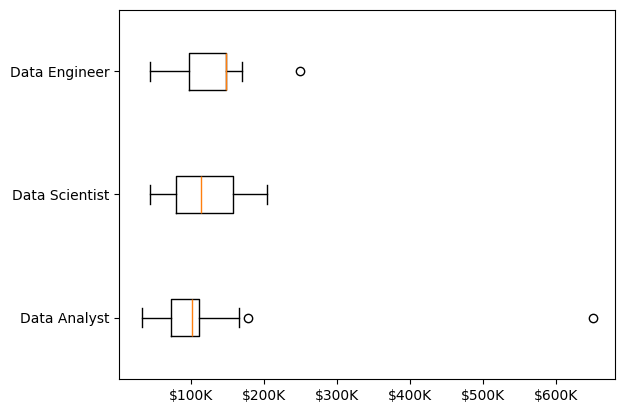

In [3]:
plt.boxplot(job_list,labels=job_titles,vert=False)
ax=plt.gca()
ax.xaxis.set_major_formatter(lambda x,pos : f'${int(x/1000)}K')
plt.show()

In [4]:
import seaborn as sns

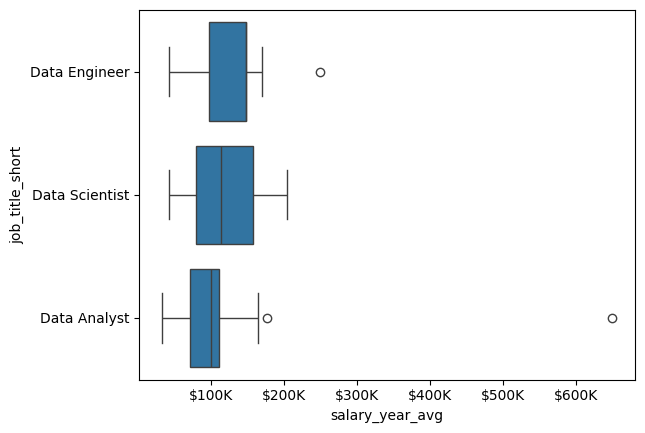

In [7]:
sns.boxplot(df_ind,x='salary_year_avg',y='job_title_short')
ax=plt.gca()
ax.xaxis.set_major_formatter(lambda x,pos : f'${int(x/1000)}K')
plt.show()